## Final Project Submission

Please fill out:
* Student name: Collins Kanyiri
* Student pace: full time
* Scheduled project review date/time: May 28 2023 / 11:59pm
* Instructor name: Mark Tiba
* Blog post URL: N/A



# Phase 1 Project - Microsoft Studios Movie Project

## 1. Introduction

The global film industry revenue is estimated to be $101.22 billion in 2021.The industry comprises the technological and commercial institutions of filmmaking, i.e., film production companies, film studios, cinematography, animation, film production, screenwriting, pre-production, post production, film festivals, distribution, and actors. 

Microsoft Corporation is an American multinational technology corporation headquartered in Redmond, Washington. Microsoft's best-known software products are the Windows line of operating systems, the Microsoft Office suite, and the Internet Explorer and Edge web browsers. Its flagship hardware products are the Xbox video game consoles and the Microsoft Surface lineup of touchscreen personal computers.

Ranked No. 14 in the 2022 Fortune 500 rankings of the largest United States corporations by total revenue, the corporation wishes to enter into the Movie buisness.

## 2. Business Understanding

### 2.1. Problem Statment 
Microsoft corporation, is looking to set up a movie studio to create original video content.Having no proir experience in the field their is need to reseach the current trends in the industry.
In order to make the necessary decisions resulting in the most profitable movies, there is need to look into data from movie review sites, analyse the data and come up with the recommendations that will lead to this outcome.

From the datasets provided, answers to the following questions can be sought:
   - What are the most popular genres?
   - Movie returns in both Domestic and Foreign markets.
   - What are the most popular film ratings?


### 2.2 Objectives
- Explore the datasets to answer the Problem Statment .
- Provide  conclusions and recommendations from the outcomes of the analyses.

## 3. Data Understanding
The datasets provided for this analysis were collected from different movie review sites.  
The datasets include:
1. bom.movie_gross [Box Office Mojo]
2. tmdb.movies [IMDB]
3. rt.movie_info [Rotten Tomatoes]
4. rt.reviews [Rotten Tomatoes]
5. tn.movie_budgets [The Numbers]

For this analysis, datasets 1 to 3 were used.
Their features are as follows:

**3.1. From Box Office Mojo**
- `title` - Name of the movie.
- `studio` - The studio that produced it.
- `domestic_gross` - The amount of gross earnings from its mother country.
- `foreign_gross` - The amount of gross earnings from elsewhere around the world.
- `year` - The year it was released.

**3.2. From IMDB Movies:**
- `genre_ids` - id for each genre of the Movie.
- `id` - Unique id for each movie.
- `original_language` - The original language of film.
- `popularity` - The popularity of the movie in millions.
- `release_date` - The date the Movie was released.
- `title` - The average rating out of 10. 
- `vote_average` - Average Number of votes to rate the movie out of 10.
- `vote_count` - Number of pepole who  to rate the movie.

    
**3.3. Rotten Tomatoes Movies Information:**

- `id` - Unique id for each movie.
- `synopsis` - A brief note on the premise of the movie.
- `rating` - rate of motion picture's suitability for certain audiences based on its content. 
     - R :- Restricted: Under 17 requires accompanying parent or adult guardian
     - PG-13 :- Some material may be inappropriate for children under 13
     - PG :- Some material may not be suitable for children
     - G :- All ages admitted
     - NR :- Not rated
- `genre` - A movie's category based on the plot.
- `director` - The movie's director.
- `writer` - The movie's writer.
- `theater_date` - The date the movie was released in theaters.
- `dvd_date` - The date the movie was released in dvd format.
- `currency` - - currency used.
- `Box office` - The studio returns.
- `runtime` - The total length of the movie.
- `studio` - The studio involved in the movie production.

**3.4. Rotten Tomatoes Review Information:**

- `review` - A review on the movie by a user.
- `rating` - How a user rates the movie.
- `fresh` - Rotten Tomatoes rating system,[Flesh-they liked it, rotten- the did not like it]
- `critic` - Name of the person leaving the review.
- `top_critic`  - 
- `publisher` - The publisher of the review.
- `date` - The date the review was written.

**3.5. From The Numbers:**
- `id` - Unique id for each movie.
- `release_date` - The date the Movie was released.
- `movie` - The movie name. 
- `production_budget` - amount of money used in the movie production.
- `domestic_gross` - Dometic returns of the production.
- `worldwide_gross` - worldwide returns of the production.



## 4. Data Preparation
1. import the Libraries.
2. Loading the Datasets
3. Exploring the Dataframes
4. Clean the data by dealing with:
    - Duplicated rows
    - Missing values
    - Invalid data
    - Outliers
    - Merges


### 4.1.importing relevant libraries

In [5]:
# 4.1.importing relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import numpy as np
import seaborn as sns
%matplotlib inline


### 4.2 loading the datasets

In [6]:
# 4.2 loading the datasets
bom_movies = pd.read_csv('Data/bom.movie_gross.csv')
rt_movies = pd.read_csv('Data/rt.movie_info.tsv',delimiter = '\t')
rt_reviews = pd.read_csv('Data/rt.reviews.tsv',delimiter = "\t",encoding='latin-1')
tn_movie_budgets = pd.read_csv('Data/tn.movie_budgets.csv')

#opening a connection to the imdb database
conn = sqlite3.connect("Data/im.db")



### 4.3 Exploring the Dataframes
 ##### a. Box Office Mojo

In [7]:
# previewing the top of bom_movies
bom_movies.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [10]:
# determining the number of records in the bom_movies dataframe
bom_movies.shape

(3387, 5)

In [11]:
# previewing bom_movies information
bom_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


Observations;
The following columns have missing values:studio, domestic_gross, foreign_gross.
foreign_gross is in string format.

#### b. Rt_movies

In [13]:
#previewing the top of rt_movies
rt_movies.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [14]:
# determining the number of records in the rt_movies dataframe
rt_movies.shape

(1560, 12)

In [15]:
#previewing information on rt_movies
rt_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


Observations;
some columns have missing values 
Values in genre column is separated by pipes ( | ).

#### c. rt_reviews

In [16]:
#previewing the top of rt_reviews
rt_reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [17]:
#determining the number of records in the rt_reviews dataframe
rt_reviews.shape

(54432, 8)

In [18]:
#previewing information on rt_reviews
rt_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


Observations:

The some columns  have missing values
The  appears to be out of 5.
rating system in the rating column is  inconsistent, thus drop the column.

#### d. tn_movie_budgets

In [19]:
#previewing the top of tn_movie_budgets
tn_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [20]:
#determining the number of records in the tn_movie_budgets dataframe
tn_movie_budgets.shape

(5782, 6)

In [21]:
#previewing information on tn_movie_budgets
tn_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


Observations:
NO missing values.

#### e. IMDB movies

In [28]:
#viewing the list of tables in the imdb database
imdb_tables = pd.read_sql("""
SELECT name TableNames
FROM sqlite_master
WHERE type = 'table'
;
""",conn)
imdb_tables

,TableNames
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [44]:
#previewing the movie_ratings table
imdb_movie_ratings = pd.read_sql("""
SELECT *
FROM movie_ratings
;
""",conn)
imdb_movie_ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [53]:
imdb_movie_ratings.shape

(73856, 3)

In [55]:
imdb_movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [43]:
#previewing the movie_basics table
imdb_movie_basics = pd.read_sql("""
SELECT *
FROM movie_basics
;
""",conn)
imdb_movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [52]:
imdb_movie_basics.shape

(146144, 6)

In [56]:
imdb_movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [42]:
#previewing the directors table
imdb_directors = pd.read_sql("""
SELECT *
FROM directors
;
""",conn)
imdb_directors.head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502


In [51]:
imdb_directors.shape

(291174, 2)

In [57]:
imdb_directors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291174 entries, 0 to 291173
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   movie_id   291174 non-null  object
 1   person_id  291174 non-null  object
dtypes: object(2)
memory usage: 4.4+ MB


In [41]:
#previewing the known_for table
imdb_known_for = pd.read_sql("""
SELECT *
FROM known_for
;
""",conn)
imdb_known_for.head()

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534


In [50]:
imdb_known_for.shape

(1638260, 2)

In [58]:
imdb_known_for.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1638260 entries, 0 to 1638259
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   person_id  1638260 non-null  object
 1   movie_id   1638260 non-null  object
dtypes: object(2)
memory usage: 25.0+ MB


In [48]:
#previewing the persons table
imdb_persons = pd.read_sql("""
SELECT *
FROM persons
;
""",conn)
imdb_persons.head()

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"


In [49]:
imdb_persons.shape

(606648, 5)

In [59]:
imdb_persons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   person_id           606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
dtypes: float64(2), object(3)
memory usage: 23.1+ MB


Observations
Some colums in multiple datasets have missing values.
movie_basics can be joined to movie_ratings, directors and persons table

In [13]:
#joining movie_basics to movie_ratings on movie_id and previewing the top
imdb = pd.read_sql("""
SELECT *
FROM movie_basics b
JOIN movie_ratings r
USING (movie_id)
JOIN directors d
USING (movie_id)
JOIN persons p
USING (person_id)
;
""",conn)
imdb.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,person_id,primary_name,birth_year,death_year,primary_profession
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer"
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer"
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer"
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer"
4,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,nm0002411,Mani Kaul,1944.0,2011.0,"director,writer,actor"


In [61]:
#closing the connection to the  im-database
conn.close()

In [62]:
#checking the information
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181387 entries, 0 to 181386
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   movie_id            181387 non-null  object 
 1   primary_title       181387 non-null  object 
 2   original_title      181387 non-null  object 
 3   start_year          181387 non-null  int64  
 4   runtime_minutes     163584 non-null  float64
 5   genres              180047 non-null  object 
 6   averagerating       181387 non-null  float64
 7   numvotes            181387 non-null  int64  
 8   person_id           181387 non-null  object 
 9   primary_name        181387 non-null  object 
 10  birth_year          54805 non-null   float64
 11  death_year          1342 non-null    float64
 12  primary_profession  181262 non-null  object 
dtypes: float64(4), int64(2), object(7)
memory usage: 18.0+ MB


In [63]:
# checking the shape
imdb.shape

(181387, 13)

In [65]:
# previewing imdb
imdb

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,person_id,primary_name,birth_year,death_year,primary_profession
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer"
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer"
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer"
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer"
4,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,nm0002411,Mani Kaul,1944.0,2011.0,"director,writer,actor"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181382,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8,nm5300859,Chris Jordan,NaN,NaN,"director,writer,editor"
181383,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8,nm5300859,Chris Jordan,NaN,NaN,"director,writer,editor"
181384,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5,nm1716653,Laura Jou,NaN,NaN,"miscellaneous,actress,director"
181385,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5,nm1716653,Laura Jou,NaN,NaN,"miscellaneous,actress,director"


### 4.4 Clean the data
#### Duplicated  rows

In [66]:
#defining a function  for checking for number of duplicated rows
def check_duplicates(df):
    duplicates = df.duplicated().sum()
    print (f"There are {duplicates} duplicated rows")

In [67]:
#checking for duplicates in bom_movies dataframe
check_duplicates(bom_movies)

There are 0 duplicated rows


In [68]:

#checking for duplicates in rt_movies dataframe
check_duplicates(rt_movies)

There are 0 duplicated rows


In [69]:
#checking for duplicates in rt_reviews dataframe
check_duplicates(rt_reviews)

There are 9 duplicated rows


In [70]:
#checking for duplicates in tn_movie_budgets dataframe
check_duplicates(tn_movie_budgets)

There are 0 duplicated rows


In [71]:
#checking for duplicates in imdb dataframe
check_duplicates(imdb)

There are 95357 duplicated rows


In [72]:
#dropping duplicates in imdb, rt_reviews
imdb.drop_duplicates(inplace = True)
rt_reviews.drop_duplicates(inplace = True)

In [73]:
#confirming that duplicates have been dropped 
check_duplicates(imdb)
check_duplicates(rt_reviews)

There are 0 duplicated rows
There are 0 duplicated rows


#### Missing Values

##### a) bom_movies

In [74]:
#checking for missing values in bom_movies
bom_movies.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

Observation
The studio column and the domestic_gross column have 5 and 28 missing values respectivly. This is a small fraction of the total, we can drop this rows without affecting the analysis.
The foreign_gross column has alot of missing data.The data is in string format, hence the missing values can be replaced with 0.


In [8]:
#dropping null rows in studio and domestic_gross column
bom_movies.dropna(inplace = True, subset = ['studio','domestic_gross'])

In [9]:
#replace missing values with 0 in foreign_gross column
bom_movies.foreign_gross.fillna('0',inplace = True)

In [10]:
#confirming that missing values have been dropped 
bom_movies.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

#####  b) rt_movies

In [81]:
#checking for missing values in rt_movies
rt_movies.isna().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

Observation
synopsis, rating, genre, director,writer, theater_date, dvd_date, currency, box_office, runtime, studio contain rows with missing values.
Columns synopsis, director, writer, theater_date, dvd_date are to be dropped as they are not required for this analysis.


In [11]:
#dropping columns with too many null values
rt_movies.drop(['synopsis','director','writer','theater_date','dvd_date','currency','box_office','studio'],
               axis = 1,inplace=True)
#dropping rows with null values
rt_movies.dropna(subset = ['rating','genre','runtime'],inplace = True)

In [92]:
#confirming there are no missing values
rt_movies.isna().sum()

id         0
rating     0
genre      0
runtime    0
dtype: int64

#####  c) rt_reviews

In [83]:
#checking for missing values in rt_reviews
rt_reviews.isna().sum()

id                0
review         5556
rating        13516
fresh             0
critic         2713
top_critic        0
publisher       309
date              0
dtype: int64

Observation
columns review, rating, critic, publisher contain rows with missing values.

In [93]:
#dropping rating column
rt_reviews.drop('rating',axis=1,inplace=True)

#dropping rows with null values
rt_reviews.dropna(inplace = True)


In [94]:
#confirming there are no missing values
rt_reviews.isna().sum()

id            0
review        0
fresh         0
critic        0
top_critic    0
publisher     0
date          0
dtype: int64

#### d) tn_movie_budgets

In [87]:
#checking for missing values in tn_movie_budgets
tn_movie_budgets.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

Observation
no missing values.

#### e) imdb

In [88]:
#checking for missing values in imdb
imdb.isna().sum()

movie_id                  0
primary_title             0
original_title            0
start_year                0
runtime_minutes        8918
genres                  798
averagerating             0
numvotes                  0
person_id                 0
primary_name              0
birth_year            61334
death_year            85331
primary_profession       89
dtype: int64

Observation
Columns runtime_minutes, genres, birth_year, death_year, primary_profession contain rows with missing values.

Death_year can be filled with the word 'alive' as it would help to know if the director is still alive.


In [14]:
#filling death_year
imdb.death_year.fillna('alive', inplace = True)

#dropping rows with missing values
imdb.dropna(subset = ['runtime_minutes','genres','birth_year','primary_profession'],inplace = True)

In [15]:
#confirming there are no missing values
imdb.isna().sum()

movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes       0
genres                0
averagerating         0
numvotes              0
person_id             0
primary_name          0
birth_year            0
death_year            0
primary_profession    0
dtype: int64

#### Invalid data
The dataframes bom_movies, imdb, tn_movie_budgets and rt_movies  have Invalid data. 

#bom_movies
The foreign_gross column is in a string format. It will need to be converted to the float format in order to perform numeric operations.

#rt_movies
genre column is separated pipes
The runtime column is in string format with the word "minutes". This will be removed and converted to integer format.

#imdb
genre column are separated by commas.

#tn_movie_budgets
the production_budget,domestic_gross and worldwide_gross are strings with $ and , in between the values
it will need to remove the $ and ,  and convert the values to sring

In [16]:
#bom_movies
#removing any commas
bom_movies.foreign_gross = bom_movies.foreign_gross.map(lambda x:x.replace(",",""))

#converting to a float
bom_movies.foreign_gross = bom_movies.foreign_gross.astype(float)

In [17]:
#rt_movies
#genre column
# splitting the columns at '|'
rt_movies = rt_movies.assign(genre=rt_movies.genre.str.split('|'))

# transform into separate rows retaining all column values
rt_movies = rt_movies.explode('genre')

#runtime
#removing the word minutes
rt_movies.runtime = rt_movies.runtime.str.replace('minutes',"")

#converting to integer
rt_movies.runtime = rt_movies.runtime.astype('int')

In [51]:
#tn_movie_budgets
#removing the $ and , in production budget
tn_movie_budgets.production_budget = tn_movie_budgets.production_budget.str.replace('$',"")
tn_movie_budgets.production_budget = tn_movie_budgets.production_budget.map(lambda x:x.replace(",",""))
#converting to integer
tn_movie_budgets.production_budget = tn_movie_budgets.production_budget.astype('int')

#removing the $ and , in domestic_gross
tn_movie_budgets.domestic_gross = tn_movie_budgets.domestic_gross.str.replace('$',"")
tn_movie_budgets.domestic_gross = tn_movie_budgets.domestic_gross.map(lambda x:x.replace(",",""))
#converting to integer
tn_movie_budgets.domestic_gross = tn_movie_budgets.domestic_gross.astype('int')

#removing the $ and , in worldwide_gross
tn_movie_budgets.worldwide_gross = tn_movie_budgets.worldwide_gross.str.replace('$',"")
tn_movie_budgets.worldwide_gross = tn_movie_budgets.worldwide_gross.map(lambda x:x.replace(",",""))
#converting to integer
tn_movie_budgets.worldwide_gross = tn_movie_budgets.worldwide_gross.astype('int')

AttributeError: Can only use .str accessor with string values!

In [114]:
#Cheking the new shape in rt_movies
rt_movies.shape

(3525, 4)

In [115]:
#previewing the top of rt_movies
rt_movies.head()

,id,rating,genre,runtime
0,1,R,Action and Adventure,104
0,1,R,Classics,104
0,1,R,Drama,104
1,3,R,Drama,108
1,3,R,Science Fiction and Fantasy,108


In [101]:
#imdb
# splitting the columns at ','
imdb = imdb.assign(genres=imdb.genres.str.split(','))

# transform into separate rows retaining all column values
imdb=imdb.explode('genres')

In [102]:
#previewing the top of imdb
imdb.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,person_id,primary_name,birth_year,death_year,primary_profession
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Action,7.0,77,nm0712540,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer"
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Crime,7.0,77,nm0712540,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer"
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Drama,7.0,77,nm0712540,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer"
4,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Biography,7.2,43,nm0002411,Mani Kaul,1944.0,2011.0,"director,writer,actor"
4,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Drama,7.2,43,nm0002411,Mani Kaul,1944.0,2011.0,"director,writer,actor"


In [107]:
#Cheking the shape in imdb
imdb.shape

(41960, 13)

Observation
There are now more rows in both rt_movies and imdb.

#### Outliers
Checking for outliers in the runtime column using a box plot

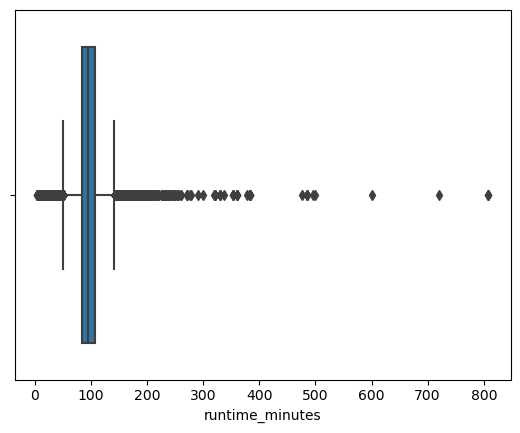

In [109]:
sns.boxplot(data = imdb, x = 'runtime_minutes');

Observation
There is clear evidence of outliers.

In [121]:
#selecting the rows with the outliers
imdb.loc[(imdb.runtime_minutes > 300) | (imdb.runtime_minutes < 30)]

#dropping the outliers
imdb = imdb.loc[(imdb.runtime_minutes <= 300) & (imdb.runtime_minutes >= 30)]

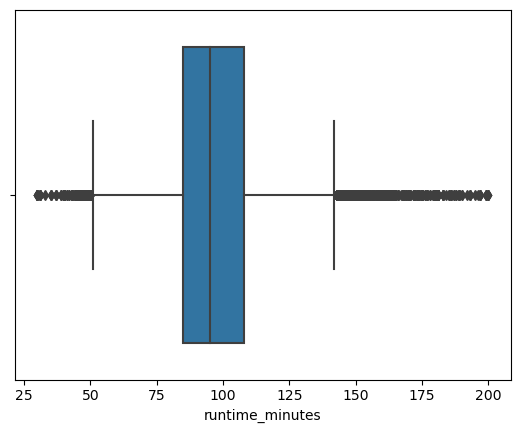

In [123]:
#previewing the new boxplot
sns.boxplot(data = imdb, x = 'runtime_minutes');

#### Merges
Rotten Tomatoes Movies has proved two dataframes(rt_movies and rt_review) that can be merged on the column [id].

In [20]:
#merging the two dataframes
rt_merged = rt_reviews.merge(rt_movies, how = 'inner',on = 'id')

#previewing the new dataframe
rt_merged.head()

,id,review,rating_x,fresh,critic,top_critic,publisher,date,rating_y,genre,runtime
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018",R,Drama,108
1,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018",R,Science Fiction and Fantasy,108
2,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018",R,Drama,108
3,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018",R,Science Fiction and Fantasy,108
4,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018",R,Drama,108


In [140]:
#Marching column names
#rename imdb column runtime_minutes to runtime
imdb.rename(columns = {'runtime_minutes':'runtime'}, inplace = True)
#rename imdb column genres to genre
imdb.rename(columns = {'genres':'genre'}, inplace = True)
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41785 entries, 0 to 181378
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_id            41785 non-null  object 
 1   primary_title       41785 non-null  object 
 2   original_title      41785 non-null  object 
 3   start_year          41785 non-null  int64  
 4   runtime             41785 non-null  float64
 5   genre               41785 non-null  object 
 6   averagerating       41785 non-null  float64
 7   numvotes            41785 non-null  int64  
 8   person_id           41785 non-null  object 
 9   primary_name        41785 non-null  object 
 10  birth_year          41785 non-null  float64
 11  death_year          41785 non-null  object 
 12  primary_profession  41785 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 4.5+ MB


In [204]:
# Now we merge all the csv datasets(bom_movies,rt_merged, imdb and tn_movie_budgets) to one dataframe
df = pd.concat([bom_movies,rt_merged, imdb, tn_movie_budgets])
df

,title,studio,domestic_gross,foreign_gross,year,id,review,fresh,critic,top_critic,...,numvotes,person_id,primary_name,birth_year,death_year,primary_profession,release_date,movie,production_budget,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000,2010.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Inception,WB,292600000.0,535700000,2010.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Shrek Forever After,P/DW,238700000.0,513900000,2010.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5777,NaN,NaN,$0,NaN,NaN,78.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"Dec 31, 2018",Red 11,"$7,000",$0
5778,NaN,NaN,"$48,482",NaN,NaN,79.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"Apr 2, 1999",Following,"$6,000","$240,495"
5779,NaN,NaN,"$1,338",NaN,NaN,80.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338"
5780,NaN,NaN,$0,NaN,NaN,81.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0


In [205]:
#cheking for duplicates 
check_duplicates(df)

There are 0 duplicated rows


In [206]:
#cheking for missing values
df.isna().sum()

title                 147926
studio                147926
domestic_gross        142144
foreign_gross         147926
year                  147926
id                     45141
review                 50923
fresh                  50923
critic                 50923
top_critic             50923
publisher              50923
date                   50923
rating                 50923
genre                   9138
runtime                 9138
movie_id              109497
primary_title         109497
original_title        109497
start_year            109497
averagerating         109497
numvotes              109497
person_id             109497
primary_name          109497
birth_year            109497
death_year            109497
primary_profession    109497
release_date          145500
movie                 145500
production_budget     145500
worldwide_gross       145500
dtype: int64

## 5.Exploratory Analysis
This section deals with analysing the data and creating visualisations that answer the business questions that will lead to appropriate recommendations.
1. What are the highly rated  genres?
2. What are the film ratings of the most watched movies?
3. What is the relationship between domestic gross earnings and foreign gross earnings?

we only need a few columns from the merged dataset, ( title, rating, genre, runtime, domestic_gross, foreign_gross, averagerating, and production_budget. The other columns proving irrelevant to this analysis, will therefore be dropped.


In [207]:
df.drop(['studio','year', 'id', 'critic', 'top_critic','publisher',
         'date','primary_title','original_title','start_year','person_id',
         'primary_name','birth_year','death_year','primary_profession',
         'release_date', 'movie', 'worldwide_gross'], axis=1, inplace=True)

In [208]:
df.head()

,title,domestic_gross,foreign_gross,review,fresh,rating,genre,runtime,movie_id,averagerating,numvotes,production_budget
0,Toy Story 3,415000000.0,652000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alice in Wonderland (2010),334200000.0,691300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Harry Potter and the Deathly Hallows Part 1,296000000.0,664300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Inception,292600000.0,535700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Shrek Forever After,238700000.0,513900000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### What are the highly rated  genres?


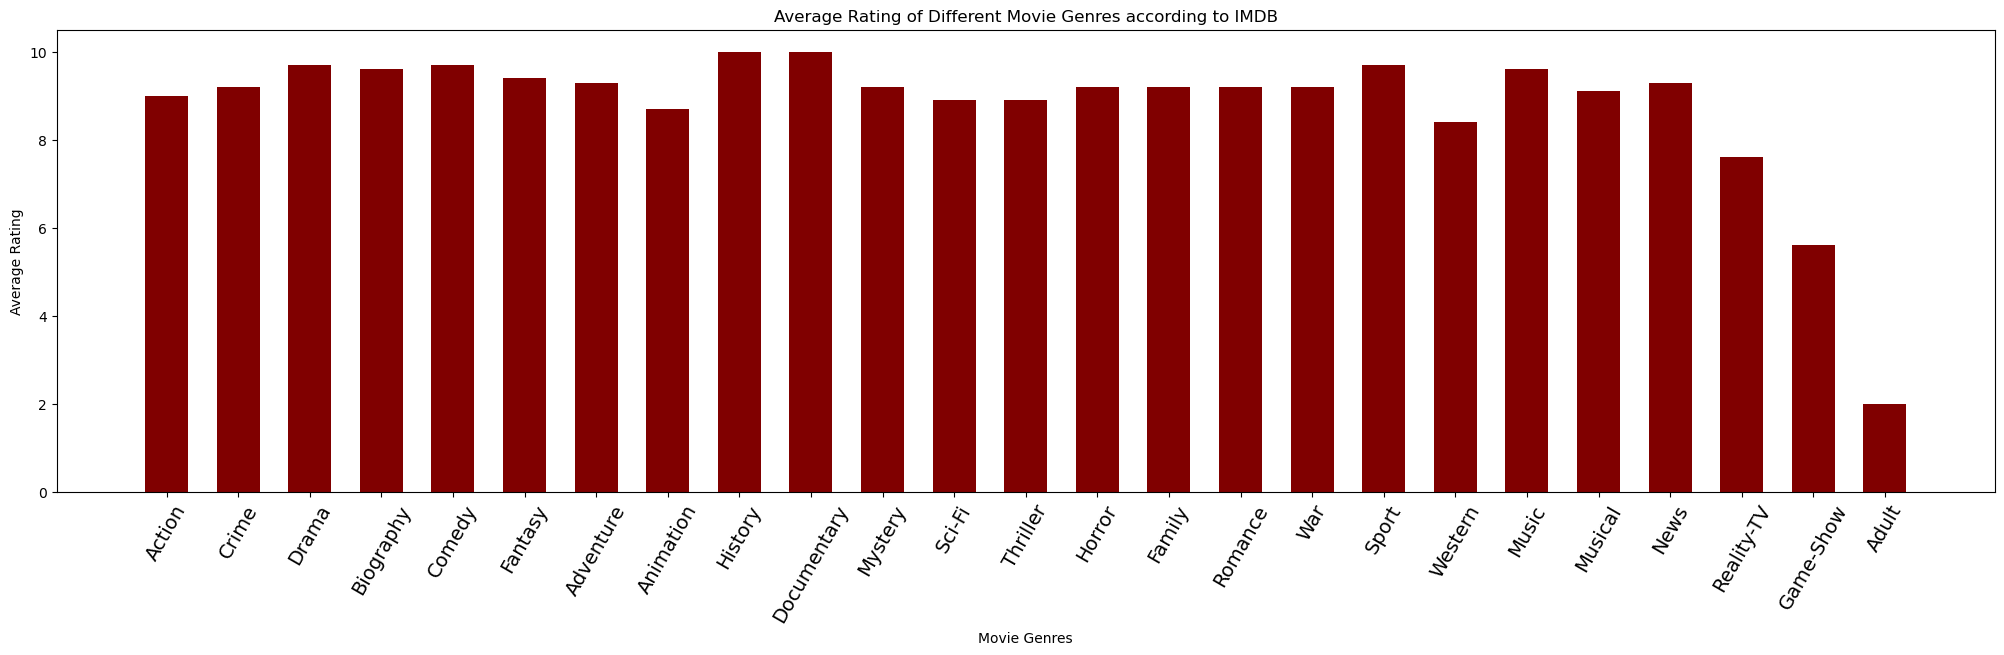

In [244]:
# Plot a bar graph with genres and averagerating as the variables

plt.data = imdb
x = imdb['genre']
y = imdb['averagerating']


#We plot the graph using the above data
plt.figure(figsize = (25,6))

# Use the bar() function to create a plot using the above values of x,y
# creating the bar plot
plt.bar(x, y, color ='maroon',
        width = 0.6)
 
    
plt.xlabel("Movie Genres")
plt.ylabel("Average Rating")
plt.title("Average Rating of Different Movie Genres according to IMDB")
plt.xticks(rotation = 60,fontsize=14)
plt.show()

Observation
History and Documentary are the highest rated genres according to imdb, while adult and Game-Shows have the lowest rating.

### 2. What are the film ratings of the most watched movies?

In [31]:
#grouping rt_merged by rating and fresh rating system
rt_ratings = rt_merged.groupby(['rating_y','fresh'])['id'].count().unstack()

#sorting values by fresh rating
rt_ratings = rt_ratings.sort_values('fresh',ascending = False)

rt_ratings

fresh,fresh,rotten
rating_y,,
R,32409,17431
PG-13,19467,18226
PG,13759,7317
NR,4933,1226
G,2655,814


C:\Users\Collins Kanyiri\AppData\Local\Temp\ipykernel_16688\3617921184.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


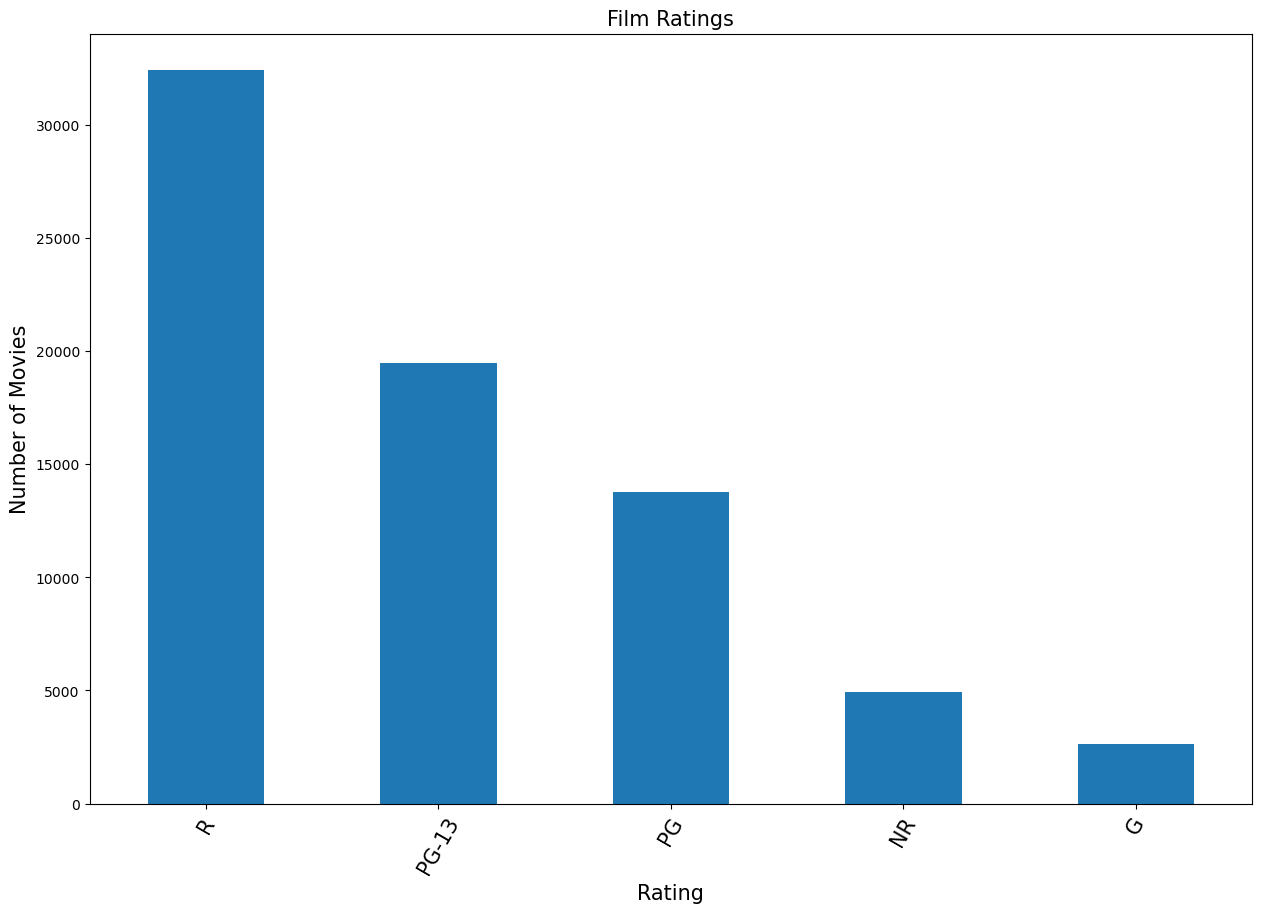

In [23]:

# Plot a bar graph with ratings and Number of Movies as the variables
fig,ax = plt.subplots(figsize=(15,10))

title = 'Film Ratings'
y_label = 'Number of Movies'
x_label = 'Rating'

rt_ratings.fresh.plot(kind = 'bar')
ax.set_title(title,fontsize=15)
ax.set_ylabel(y_label,fontsize=15)
ax.set_xlabel(x_label,fontsize=15)
plt.xticks(rotation = 60,fontsize = 15)
fig.show()

### 3. What is the relationship between domestic gross earnings and foreign gross earnings?

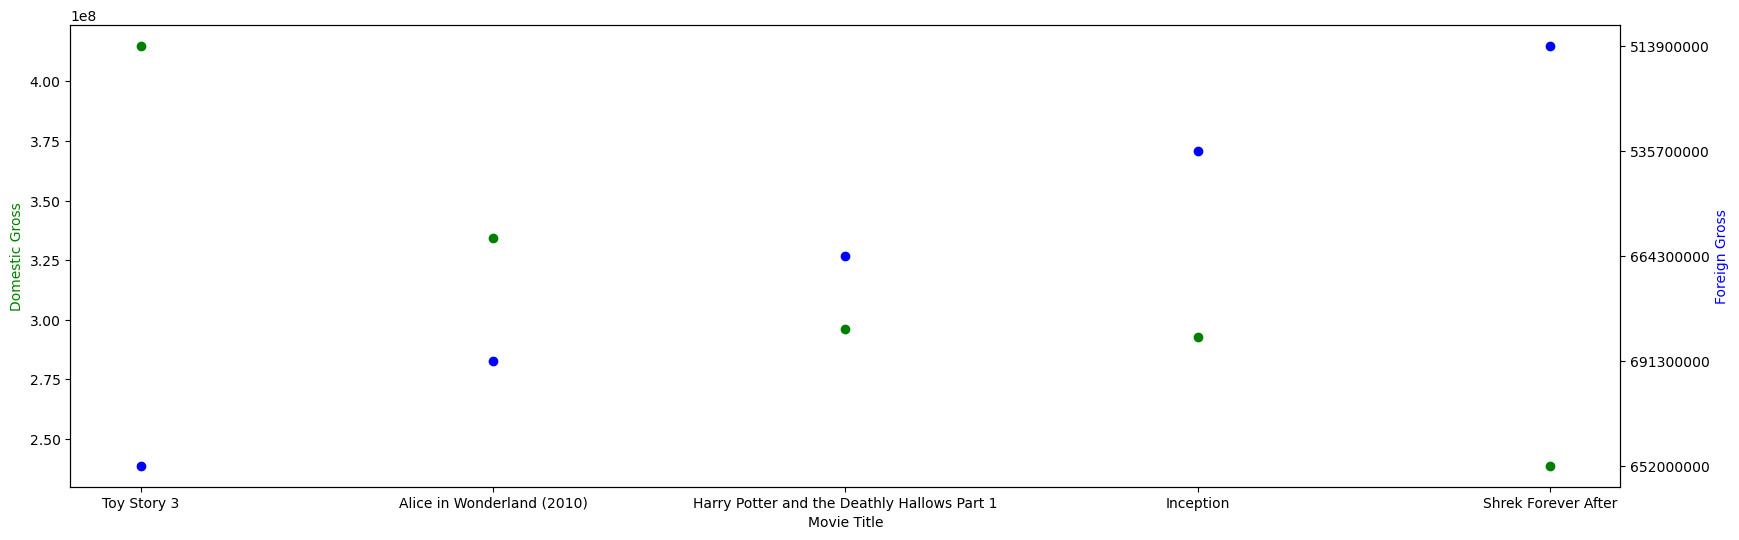

In [274]:
# Plotting a scatter plot with two variables on the y axis, foreign_gross and domestic_gross
plt.data = df.head()
fig, ax1 = plt.subplots()

# Defining the x,y1 and y2 variables
x = df.head(5)['title']
y1 = df.head(5)['domestic_gross']
y2 = df.head(5)['foreign_gross']

ax2 = ax1.twinx()
ax1.scatter(x, y1, color='green')
ax2.scatter(x, y2, color='blue')

ax1.set_xlabel('Movie Title')
ax1.set_ylabel('Domestic Gross', color='green')
ax2.set_ylabel('Foreign Gross', color='blue')

plt.gcf().set_size_inches((20, 6))
plt.show()


In [35]:
tn_movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0
